<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

Experiments of this week:
- experiment 8A: use remote function generator to create signals and analize them
- experiment 8B: understand and be able to predict sine aliasing
- experiment 8C: understand and be able to predict multiple sines aliasing

Goal: understand how digital sampling influences the measurement and what causes aliasing 

Structure of an experiment:
- Anticipate + Simulate (30 min): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Implement + Investigate (70 min): with your partner (group of 2)
- Compare + Conclude (10 min): with a group of 4 (per table)

# 8A: Taking measurements digitally and automatically


> <font color='blue'>Learning goal:</font>  Get comfortable using definitions and learn how to control deviced remotely to preform experiments  like voltage aquisition through a filer</font> 


## BACKGROUND
> <font color='grey'>⏳ Estimated time: 5 min</font>

You will be controling function generator remotely using python, in order to fully automate measuring a filter response. In the classroom you already did such measurement by hand in octal one: you measured Vin and Vout of a filter at a certain frequency, and repeated the measurement at different frequencies to step through the frequency spectrum. When doing this in an automated fashion, you will have to carefully consider which steps needs to be taken when (done in anticipate), and you will have to think about the optimal implementation  (to be explored in simulate). 

In the implement&investigate you will first learn and test the code to use the function generator remotely. Then you have all the components to write (and use!) your own automated filter response. Note: **you will need to save the data**, which will be used for analysis next week. 

Feel free to watch the precap of a previous year. 

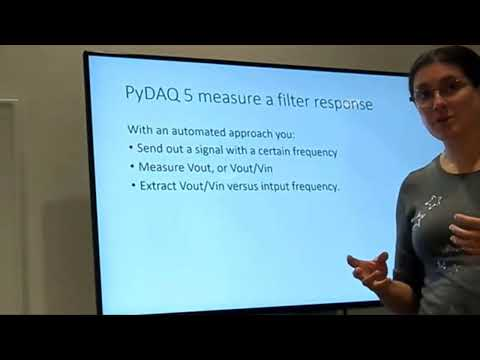

In [1]:
#precap
from IPython.lib.display import YouTubeVideo
YouTubeVideo('XAd2EXzvkm4', width = 600, height = 450)

## ANTICIPATE: how would code for automated filter response look like
> <font color='grey'>⏳ Estimated time: 15 min</font>

Below you have several steps that a functioning code for automated filter response should have. You need to order them correctly and indicate which should be in a 'for loop'. Also explain why each part is needed. Saving the data is needed as that allows you to work on it in multiple sessions without your notebook "forgeting" it.

* close NIDAQ
* initialize NIDAQ
* plot the intensity versus frequency
* save data
* set the frequency (in function generator)
* initialize function generator
* wait
* analyze a signal ( extract needed values)
* acquire a signal
* close function generator
* define your input frequencies
* input values into an array

In [1]:
### TO DO=" your correct list of steps"


## SIMULATE: how to extract the data?
> <font color='grey'>⏳ Estimated time: 5 min</font>

It is great to have as much of your code prepared and tested before you do your measurement. In this simulate you will first look at several ways of implementing a loop over a given frequency array. 

* Which option would you prefer and why?

9000 9000 9000


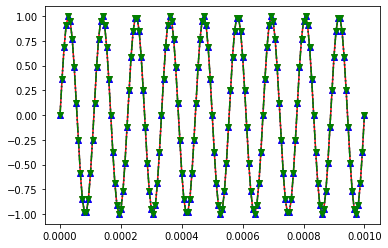

In [11]:
import numpy as np
import matplotlib.pyplot as plt

freq=np.arange(1000,10000,1000) #start, stop, step
time=np.linspace(0,1e-3,151) #start, stop, number

#option1: loop over the frequency
for ff in freq:
    signal1=np.sin(2*np.pi*ff*time)
    
#option2: loop over the index of the frequency
for ii in range(len(freq)):
    signal2=np.sin((2*np.pi*freq[ii]*time))
    
#option3: hardcoded
for jj in range(9):
    freqs=(jj+1)*1000
    signal3=np.sin((2*np.pi*freqs*time))   

plt.plot(time,signal1,'r-x', time,signal2,'b:^', time, signal3, 'g-.v')

As you can see, the outcome of all loops is identical. So you might not be able to tell which one is best yet. 

Lets continue, and ask yourself what do we want to measure as a filter response, and how do we extract it from each time trace?

In the following code: extract the relevant information (from the 'measured', now simulated, signal). Check whether this extraction is optimal by writing the correct data_analyzed= code,and verify with the requested plot. In this plot GS and data_analyzed should be overlapping/identical, and they represent a bandpass filter.  


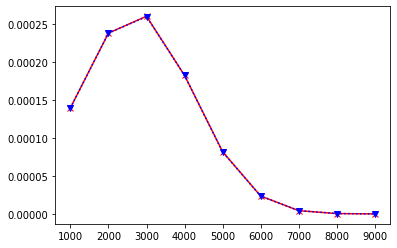

In [29]:
import numpy as np
import matplotlib.pyplot as plt

freq=np.arange(1000,10000,1000) #start, stop, step
time=np.linspace(0,1e-3,151) #start, stop, number

def gaussian(x, mu, sig):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2))

GS=gaussian(freq, 2700, 1500)


data_analyzed=np.zeros(len(freq))

#option1: loop over the frequency
for ff in freq:
    index=(np.where(ff==freq))
    signal1=np.sin(2*np.pi*ff*time)*GS[index]
### TO DO="code to extract the correct data_analyzed from the signal"
    data_analyzed[index]=

    
#option2: loop over the index of the frequency
for ii in range(len(freq)):
    signal2=np.sin((2*np.pi*freq[ii]*time))*GS[ii]
### TO DO=" (same) code to extract the correct data_analyzed from the signal"
    data_analyzed[index]=
    
#option3: hardcoded
for jj in range(9):
    freqs=(jj+1)*1000
    signal3=np.sin((2*np.pi*freqs*time))*GS[jj]
### TO DO="(same) code to extract the correct data_analyzed from the signal"
    data_analyzed[index]=

# plot the expected value, GS, and your data_analyzed, they should be identical

plt.plot(freq,GS,'r-x', freq, data_analyzed, 'b:v')


## IMPLEMENT & INVESTIGATE 1: controling function generator remotely
> <font color='grey'>⏳ Estimated time: 10 min</font>

Below you will find complete code used to control function generator remotely. **Make sure you are working on the desktop in the studio classroom!**

Study this code and try to figure out what each part does. Try modyfing the values of the text to see how they are affect the output of function generator (use the second cell for that). You can also uncommment the text statements to see what they change. Keep in mind that function generator works with a bit of time delay, so you might not see a difference instantiously when you run the code. 

You should hear and see the function generator responding. It switches to remote control, use the function 'Local' on the generator to get back local control. 

In [ ]:
# don't alter this cell, keep it as given and play around with the code in the next one.
#funcgen usb python, visa
import pyvisa

### for convenience (for later use) we give you the initialization, which only has to run once, as function 
def initialize_fun_gen():
    import pyvisa # just to be sure, better to call it already outside & before the function, so pyvisa can also be used outside the function
    rm = pyvisa.ResourceManager()
    resources=rm.list_resources()
    for ii in range(len(resources)):
        if resources[ii][0:3]=='USB':
            my_instrument = rm.open_resource(resources[ii])
            my_instrument.read_termination = '\n'
            my_instrument.write_termination = '\n'
            tmp=my_instrument.query('*IDN?')
            if tmp.find(',335'): # goes right if 335 is only in the FuncGen name
                print('FuncGen connected' )
                break
    set_volt=2.2
    set_offset=0 
    text='OUTPut:LOAD 50'   #text='OUTPut:LOAD INFinity'
    tmp2=my_instrument.write(text)
    return(my_instrument,rm)
    
my_instrument,rm=initialize_fun_gen()
set_freq=5000
set_volt=2.2
set_offset=0 

text='APPL:SIN {0}, {1}, {2}'.format(set_freq,set_volt,set_offset)
#text='APPL:SQUARE {0}, {1}, {2}'.format(set_freq,set_volt,set_offset)
tmp2=my_instrument.write(text)

text='OUTPut:LOAD 50'
#text='OUTPut:LOAD INFinity'
tmp2=my_instrument.write(text)

text='OUTPut OFF'
tmp2=my_instrument.write(text)



In [ ]:
# play around with the text, and the following set_** variables, or comment/uncomment lines
set_freq=5000
set_volt=2.2
set_offset=0 

text='APPL:SIN {0}, {1}, {2}'.format(set_freq,set_volt,set_offset)
#text='APPL:SQUARE {0}, {1}, {2}'.format(set_freq,set_volt,set_offset)
tmp2=my_instrument.write(text)

text='OUTPut:LOAD 50'
#text='OUTPut:LOAD INFinity'
tmp2=my_instrument.write(text)

text='OUTPut OFF'
tmp2=my_instrument.write(text)

rm.close() #this is closing the function generator connection


In [ ]:
### TO DO="what do different parts of code do?"

Now you can control function generator by python **only**. If you wish to return to manual operation, press the **Local** button on the function generator itself.  

## IMPLEMENT & INVESTIGATE 2: automated measurement
> <font color='grey'>⏳ Estimated time: 60 min</font>

To create the automatic filter response, you will need 2 codes you already have: the above remote function generator control and *Analog Input code*.

You will split automatic filter response code into several functions, for clarity and troubleshooting. 

First, build your setup. Filter is an aliminium box labeled "filter". Make sure it is connected to the right DAQ channel, in the correct orientation. You can also connect to the scope if you want to observe what is happening inside the loop.

Now you will create the functions. You will have to complete some of them, and later call them in a right order to create working code. 

> ### <font color='blue'>Hint:</font>
if you are unsure what to import for nidaq, look at 7A

In [ ]:
#function to adapt
def taking_measurement(sampling_rate,number_of_samples):
    frequency=np.arange(1e3,100e3,50e3) #use this for quick trial (see whether code runs without errors)
    frequency=np.arange(1e3,70e3,1e3) # use this one for better frequency range coverage
    Vout=np.zeros(np.shape(frequency))
    data=np.zeros((number_of_samples, len(frequency)))

    text='OUTPut ON'
    tmp2=my_instrument.write(text)
    with nidaqmx.Task() as task:
        task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
        task.timing.cfg_samp_clk_timing(rate=sampling_rate, samps_per_chan=number_of_samples)
        task.triggers.start_trigger.cfg_dig_edge_start_trig(trigger_source = "/Dev1/PFI0", trigger_edge = Edge.RISING)
        for ii in range(???):
            ### TO DO="set_freq=??? #freq depends on ii"
            set_freq=
            
            ### TO DO="text=??? #text to be send to the function generator"
            text=
            
            ### TO DO=" tmp2=??? #don't forget to send the command to the function generator "
            tmp2=
            
            time.sleep(0.2)
            ### TO DO="measurement2 = task.read(???) # a single time trace"
            measurement2 = 
            
            ### TO DO="Vout[ii]=??? #something of measurement2, what do you want to analyse ?"
            Vout[ii]=
            
            data[:,ii]=measurement2 # for convenience, to later on be able to check individual traces without a new recording
    return Vout,data,frequency,measurement2


In [ ]:
# you need to use my_instrument=initialize_fun_gen(), already defined in I&I1

In [ ]:
# this code needs addition from your earlier 7A analog NIDAQ input 
# libraries to import in the function itself
import nidaqmx
import numpy as np
import matplotlib.pyplot as plt
import time
from nidaqmx.constants import AcquisitionType, Edge, LineGrouping
def initialize_all_else():
    ### TODO ="# system=???# plus make sure all imported libraries are available in the function"

    system = 
    
    sampling_rate = 50000 # for the later exercise 50kHz sampling is better
    number_of_samples = 5000 # measure one second
    return system, sampling_rate,number_of_samples


Now think in what order do you need to put those in (look back at your ANTICIPATE). Remember to close all devices at the end (with one command - look back at I&I1). Also remember when definition returns something, you need to put in into a variable. For simplicity call them the same as they are called in the def.

In [ ]:
#1

#2

#3

#closing


In [ ]:
### TO DO="implement the three(plus closing) steps using initialize_fun_gen, initialize_all_else, and taking_measurement, don't forget to use the right outputs of these functions"
              
# in total you should have 4 lines of code here

Now it is time to plot your data and save your data! We want to see 3 types of plots, to really see the difference. You will be using matplotlib library that you should have called for in your initialize_all_else().

You do want to see the steady behavior, -3dB point and slope of this High or Low pass filter.



In [ ]:
# if plotting after closing the notebook
# import matplotlib.pyplot as plt
# make 3 subplots: 1. V(t), 2 V(f) with regular axis and 3 V(f) in log-log plot (plt.loglog)
dt=1/sampling_rate
plt.subplot(1,3,1), 

### TO DO="define the correct time_axis=???"
time_axis=

plt.plot(time_axis, measurement2), plt.xlim([0,0.0001]) # look at (the last) recorded time_trace
plt.subplot(1,3,2), plt.plot(frequency, Vout, '-*' ) 
plt.subplot(1,3,3), plt.loglog(frequency, Vout, '-*' ) 


In [ ]:
### TO DO="what type of filter is it, what is -3dB point"


In [ ]:
# SAVE YOUR DATA FOR LATER USE
# if you use this option then you will have to rework code in 8B to load each part individually (look how it is done in a cell below)
np.save('data_week_8A_dt', dt)
np.save('data_week_8A_sampling_rate' ,  sampling_rate)
np.save('data_week_8A_Vout' ,Vout) 
np.save('data_week_8A_frequency' , frequency)
np.save('data_week_8A_data', data)

# other option, all data parts at once, will not work in Alpaca Kernel with picopi

#this is the option that is called in 8B
'''np.savez('data_week_8A', dt,sampling_rate, Vout, frequency, data)'''

Now see if you are able to load your data and plot it again.

Figure out where your data is located (it will be probably in downloads in C drive). When it is on H (personal) drive, you can access it later again. If it is on another drive (like C), then copy-paste it to your personal drive (H:). 

> <font color='red'> **all data on C-drive gets erased, so do save your data elsewhere**

In [ ]:
# LOAD YOUR DATA BACK (FOR INSTANCE AT HOME)
dt=       np.load(r'data_week_8A_dt.npy')
sampling_rate=np.load(r'data_week_8A_sampling_rate.npy')
Vout=     np.load(r'data_week_8A_Vout.npy')
frequency=np.load(r'data_week_8A_frequency.npy')
data=     np.load(r'data_week_8A_data.npy')

# other option, all data parts at once, will not work in Alpaca Kernel with picopi

# this is the option that is called in 8B
'''tmp=np.load(r'data_week_8A.npz')'''
#dt, sampling_rate, Vout, frequency, data = tmp['arr_0'],tmp['arr_1'],tmp['arr_2'],tmp['arr_3'], tmp['arr_4']

# in order to make an fft of measurement2 (raw data) 
#don't forget to copy this data to your own laptop/Vocareum!!!!!!

## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 10 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 


**to be checked off by a TA:**
1. graph of Vout and meas-freq versus input frequency 
2. what type of filter is that, where is a -3db point
3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved


In [ ]:
#8A automated filter response
### TO DO = "2. write your answer here about the type of filter and -3dB point"

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"


In [ ]:
%python
#recording
from IPython.lib.display import YouTubeVideo
YouTubeVideo('CuowUpf-nZg', width = 600, height = 450)